<a href="https://colab.research.google.com/github/Mqondisi-Mavuso/cow_facial_recognition/blob/main/VGG16_85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

## deleting some images 

In [ ]:
# import os
# import random

# def main():
#     parent_folder = "/content/drive/MyDrive/cow_id_AI/DATA_3/test"  # Replace this with the path to your parent folder
#     keep_count = 10  # Number of images to keep in each subfolder

#     for subdir, dirs, files in os.walk(parent_folder):
#         if not dirs:  # Check if the current directory has no subdirectories (i.e., it's a subfolder)
#             if len(files) > keep_count:
#                 images = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.webp'))]
#                 images_to_delete = random.sample(images, len(images) - keep_count)

#                 for image in images_to_delete:
#                     os.remove(os.path.join(subdir, image))
#                     print(f"Deleted {image} in {subdir}")

# if __name__ == "__main__":
#     main()


In [ ]:
data_dir = "/content/drive/MyDrive/cow_id_AI/DATA_3/train"
img_height,img_width=224, 224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  label_mode="categorical",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 880 files belonging to 22 classes.
Using 792 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  label_mode="categorical",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 880 files belonging to 22 classes.
Using 88 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['c1', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c2', 'c20', 'c21', 'c22', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [ ]:
model = Sequential()

pretrained_model= tf.keras.applications.EfficientNetV2L(include_top=False,
                   input_shape=(224, 224, 3),
                   pooling='avg',classes=22,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
# model.add(Dense(512, activation='relu'))
model.add(Dropout(0.025))
model.add(Dense(22, activation='softmax'))
model.add(Dropout(0.025))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 1280)             117746848 
 l)                                                              
                                                                 
 module_wrapper_3 (ModuleWra  (None, 1280)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 1280)             0         
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 22)               28182     
 pper)                                                           
                                                                 
 module_wrapper_6 (ModuleWra  (None, 22)              

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
25/25 [==============================] - 94s 2s/step - loss: 3.1835 - accuracy: 0.1957 - val_loss: 2.6072 - val_accuracy: 0.3977
Epoch 2/10
25/25 [==============================] - 53s 2s/step - loss: 2.5992 - accuracy: 0.5619 - val_loss: 2.1310 - val_accuracy: 0.7727
Epoch 3/10
25/25 [==============================] - 54s 2s/step - loss: 2.2446 - accuracy: 0.7904 - val_loss: 1.7996 - val_accuracy: 0.8636
Epoch 4/10
25/25 [==============================] - 54s 2s/step - loss: 1.8854 - accuracy: 0.8624 - val_loss: 1.5263 - val_accuracy: 0.9091
Epoch 5/10
25/25 [==============================] - 54s 2s/step - loss: 1.7508 - accuracy: 0.8876 - val_loss: 1.3246 - val_accuracy: 0.8864
Epoch 6/10
25/25 [==============================] - 54s 2s/step - loss: 1.3934 - accuracy: 0.9217 - val_loss: 1.1678 - val_accuracy: 0.8977
Epoch 7/10
25/25 [==============================] - 53s 2s/step - loss: 1.2826 - accuracy: 0.9306 - val_loss: 1.0348 - val_accuracy: 0.9091
Epoch 8/10
25/25 [==

**Evaluating the model **

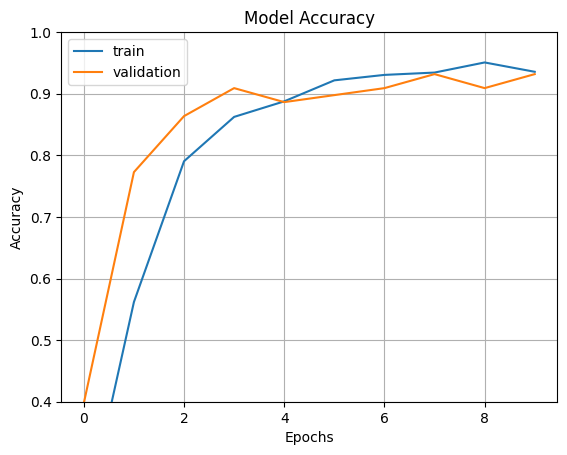

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

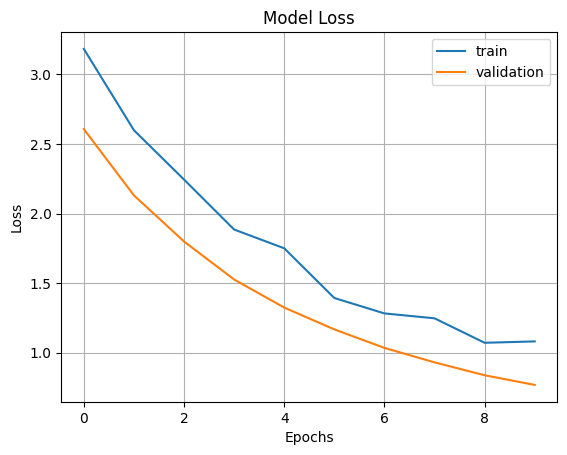

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Making Preditions 

In [ ]:
import cv2
#vgg16_model = keras.models.load_model('/content/drive/MyDrive/cow_id_AI/vgg16_62')
image=cv2.imread("/content/drive/MyDrive/cow_id_AI/DATA_3/test/c10/b_c113_cropped_0.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 [==============================] - 7s 7s/step
The predicted class is c14


In [ ]:
# Already saved model
# vgg16_model = keras.models.load_model('/content/drive/MyDrive/cow_id_AI/vgg16_62')
# test_dir = '/content/drive/MyDrive/cow_id_AI/DATA/test'
# img_height,img_width=224, 224
# test_generator = tf.keras.preprocessing.image_dataset_from_directory(
#     test_dir,
#     image_size=(img_height,img_width),
#     batch_size=5,
#     label_mode='categorical',
#     shuffle=False)


# # Evaluate your model
# test_loss, test_accuracy = vgg16_model.evaluate(test_generator)

# # Print the results
# print(f"Test accuracy: {test_accuracy}")

Found 65 files belonging to 22 classes.
13/13 [==============================] - 42s 3s/step - loss: 1.6074 - accuracy: 0.7077
Test accuracy: 0.7076923251152039


In [ ]:
# Newly tested model
test_dir = '/content/drive/MyDrive/cow_id_AI/DATA_3/test'
test_generator = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height,img_width),
    batch_size=32,
    label_mode='categorical',
    shuffle=False)


# Evaluate your model
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the results
print(f"Test accuracy: {test_accuracy}")

Found 220 files belonging to 22 classes.
7/7 [==============================] - 13s 2s/step - loss: 1.3904 - accuracy: 0.7182
Test accuracy: 0.7181817889213562


Saving the model

In [ ]:
EfficientNetV2L = model
EfficientNetV2L.save('/content/drive/MyDrive/cow_id_AI/EfficientNetV2S_85_1604')

In [ ]:
# LOADING THE MODEL
model = keras.models.load_model('/content/drive/MyDrive/cow_id_AI/vgg16_62')

#predict on the image using saved model
image=cv2.imread("/content/drive/MyDrive/cow_id_AI/DATA/test/c14/c14_1_cropped_0.jpg")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


1/1 [==============================] - 1s 785ms/step
The predicted class is cow19
